In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [8]:
df_all = pd.read_csv('eua_price_data.csv', thousands=',')
df_all['Date'] = pd.to_datetime(df_all['Date'], format='%Y-%m-%d')
df_all.set_index('Date', inplace = True)
df_all = df_all.sort_index( ascending=True)

Text(0, 0.5, 'EUA price, Euro/tonne')

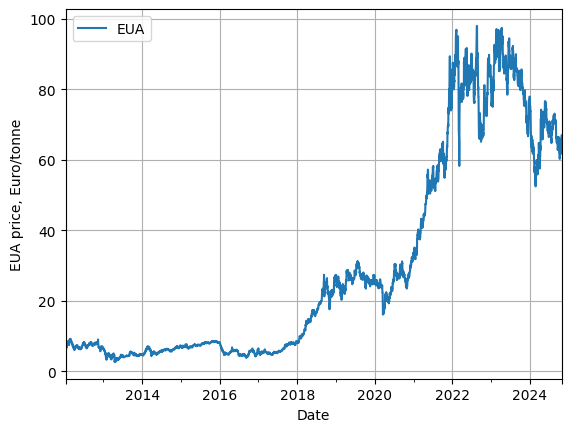

In [12]:
df_all.plot(kind='line', y = 'EUA', grid ='on')
plt.ylabel('EUA price, Euro/tonne')

In [ ]:
# normalization
data = df_all.values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [16]:
# pca
pca = PCA()
pca.fit(data)

PCA()

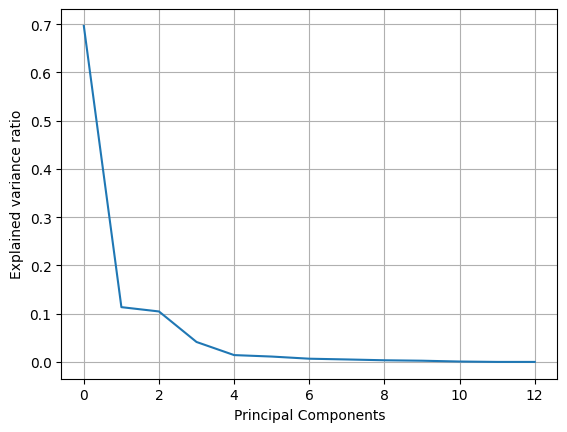

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.grid('on')

In [20]:
data_pc = pca.transform(data)[:,:4]

In [33]:
inertia_ = []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, random_state = 88888)
    kmeans.fit(data_pc)
    inertia_.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

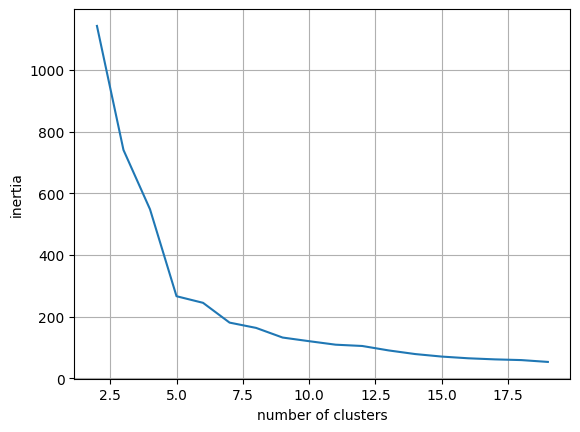

In [34]:
plt.plot(range(2,20), inertia_)
plt.grid('on')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

In [35]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(data_pc)
cluster_ = kmeans.predict(data_pc)

In [36]:
df_all['cluster'] = cluster_
df_all['PC1'] = data_pc[:,0]
df_all['PC2'] = data_pc[:,1]

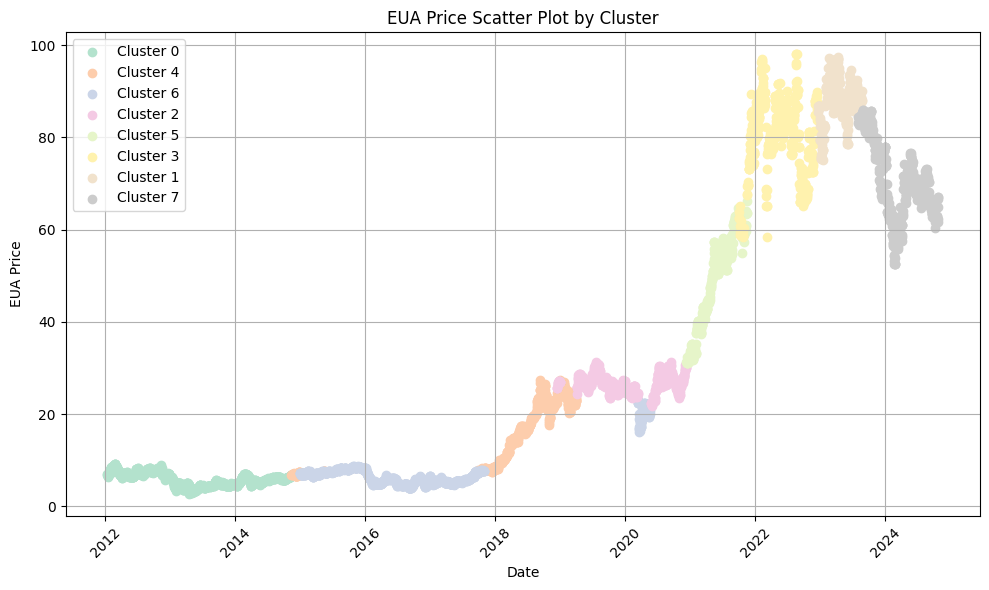

In [37]:
# Prepare the data
unique_clusters = df_all['cluster'].unique()  # Get unique cluster IDs
cmap = plt.get_cmap('Pastel2')  # Set color map for clusters
# Create scatter plot
plt.figure(figsize=(10, 6))
# Plot each cluster with a unique color
for i, cluster in enumerate(unique_clusters):
    cluster_data = df_all[df_all['cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['EUA'],
                label=f'Cluster {cluster}',
                color=cmap(i / len(unique_clusters)))  # Color based on cluster

# Customize plot
plt.title('EUA Price Scatter Plot by Cluster')
plt.xlabel('Date')
plt.ylabel('EUA Price')
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Show plot
plt.tight_layout()
plt.show()

In [41]:
import plotly.graph_objects as go
# Assuming 'df_all' is your DataFrame and 'cluster' column contains cluster IDs
# Example structure of df_all:
# df_all = pd.DataFrame({'Date': ..., 'EUA': ..., 'cluster': ...})
# Get unique clusters
unique_clusters = df_all['cluster'].unique()
# Initialize the figure
fig = go.Figure()
# Loop through each cluster and add it as a separate trace
for cluster in unique_clusters:
    cluster_data = df_all[df_all['cluster'] == cluster]
    # Add scatter trace for the cluster
    fig.add_trace(go.Scatter(
    x=cluster_data.index,
    y=cluster_data['EUA'],
        mode='markers',
        name=f'Cluster {cluster}',  # Name for the legend
        marker=dict(size=7),
        showlegend=True
        ))
# Customize layout
fig.update_layout(
title='EUA Price Scatter Plot by Cluster',
xaxis_title='Date',
yaxis_title='EUA Price',
height=600,
width=1000,
legend_title='Cluster'
)
# Show the plot
fig.show()